# Librerias

In [73]:
# Librerias
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

#Machine Learning
from pmdarima import auto_arima

# Cargamos datos

In [74]:
#Cargamos datos

url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

def GetData(url):
    data = pd.read_csv(url)
    data.to_csv("../data/raw/data.csv", index = False)
    
    return data

data = GetData(url)

# Limpieza del Dataset

- Le damos formato a la fecha y la seteamos como el indice

In [75]:
def DateFormat(dataset):
    dataset["date"] = pd.to_datetime(dataset["date"])
    return dataset.set_index("date")
    
dataSales = DateFormat(data)

# Graficamos la serie

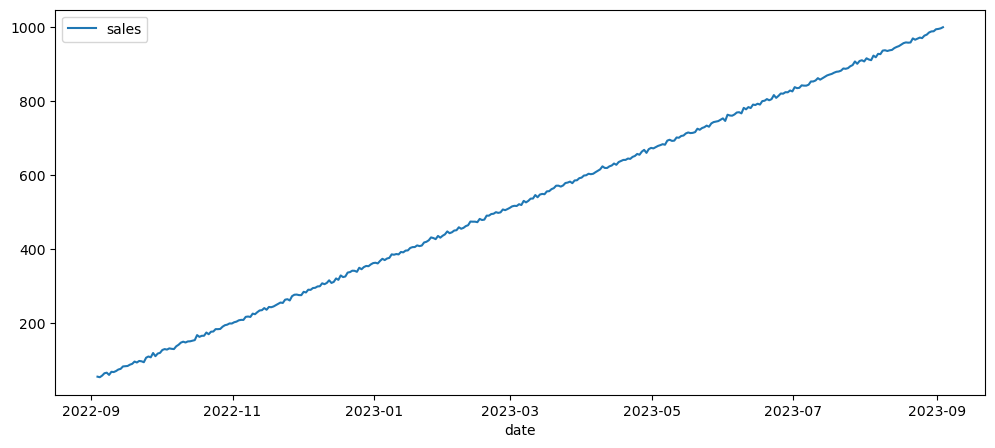

In [76]:
def GraphicTimeSerie(dataset):
    
    #Creamos la figura
    fig, axis =  plt.subplots(figsize=(12,5))
    
    sns.lineplot(data = dataset)
    
    return plt.show()

GraphicTimeSerie(dataSales)

- Test Dickey-Fuller

In [77]:
def TestStationarity(dataset):
    dfTest = adfuller(dataset, autolag="AIC")
    
    dict_dfTest = {
        "Test Statics: " : dfTest[0],
        "p-value: " : dfTest[1],
        "Lags Used " : dfTest[2],
        "Number of Observations Used" : dfTest[3],
        "Critical Value" : dfTest[4]
    }
    
    with open("../data/interim/dickey-fuller-test.json", "w") as f:
        json.dump(dict_dfTest, f)
    
    print("Dickey-Fuller Test:\n")
    
    for key, value in dict_dfTest.items():
        if (key != "Critical Value"):
            print (f"{key}: {value}")
        elif (key == "Critical Value"):
            print("Critical Values: ")
            for ckey, cvalue in value.items():
                print(f"{ckey}: {cvalue}")
            
    print("\n----Stationary Serie----\n Stationary Serie: p-value < 0.05\n Not Stationary Serie: p-value => 0.05")
    return dict_dfTest

dckFullerTest = TestStationarity(dataSales)

Dickey-Fuller Test:

Test Statics: : 0.5454141937063737
p-value: : 0.9861899815311063
Lags Used : 13
Number of Observations Used: 352
Critical Values: 
1%: -3.4490648539347544
5%: -2.8697861692116478
10%: -2.5711631253228306

----Stationary Serie----
 Stationary Serie: p-value < 0.05
 Not Stationary Serie: p-value => 0.05


- Descomposicion de la serie

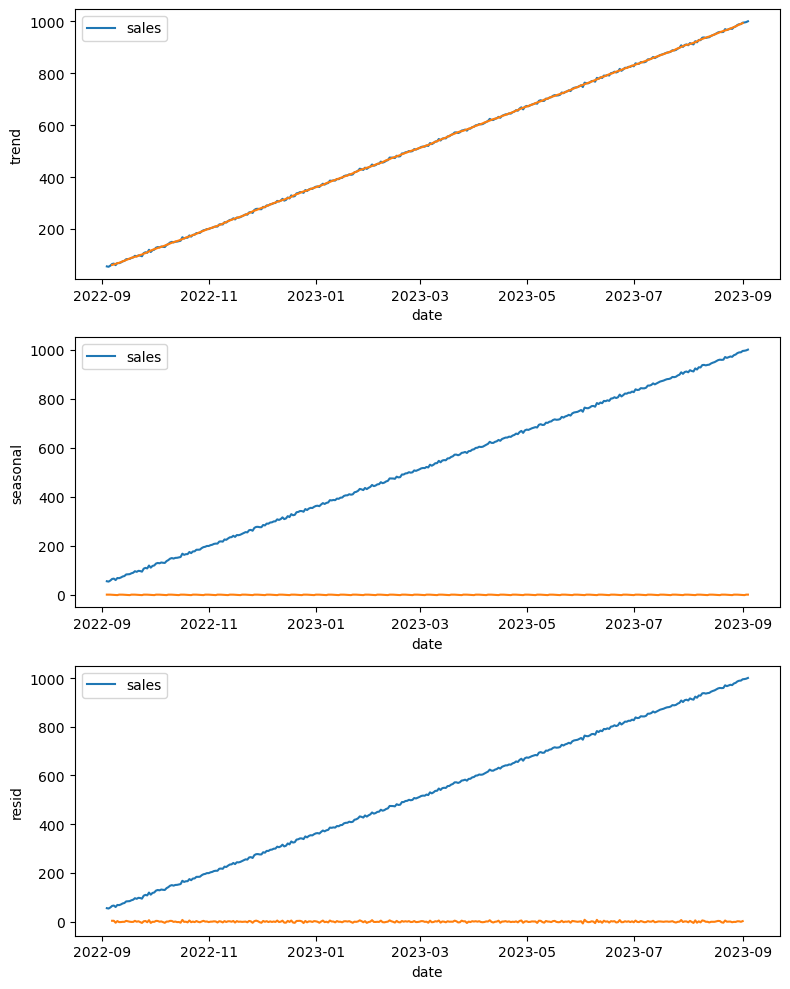

In [78]:
def DecomposerSerie(dataset):
    decomposion = seasonal_decompose(dataset)
    
    #Analisis Varios
    trending = decomposion.trend
    season = decomposion.seasonal
    residual = decomposion.resid #La variabilidad
    
    fig, axis =  plt.subplots(3,1, figsize=(8, 10))

    sns.lineplot( ax=axis[0], data = dataset)
    sns.lineplot( ax=axis[0], data = trending)
    sns.lineplot( ax=axis[1], data = dataset)
    sns.lineplot( ax=axis[1], data = season)
    sns.lineplot( ax=axis[2], data = dataset)
    sns.lineplot( ax=axis[2], data= residual)
    
    plt.tight_layout()
    plt.show()
    
DecomposerSerie(dataSales)

-Tendencia: ascendente.

-Estacionalidad: No estacionaria.

-Variabilidad: No hay presencia significativa de ruido.

- Analisis de Autocorrecion

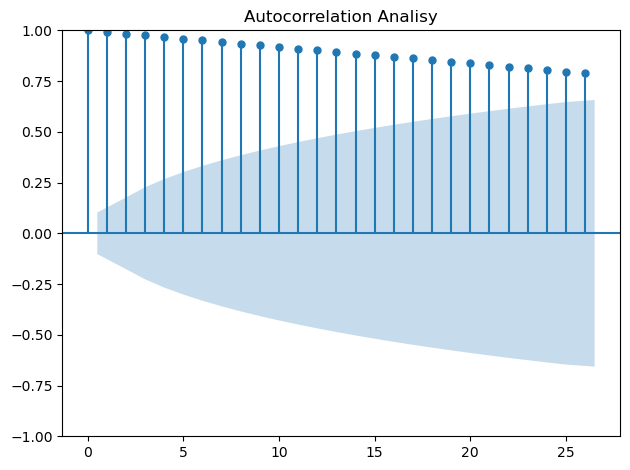

In [79]:
def AnalisyACF(dataset):

    plot_acf(dataset, title="Autocorrelation Analisy")
    
    plt.tight_layout()
    plt.show()

AnalisyACF(dataSales)

- La autocorrelación va bajando a través del tiempo. No parece bajar del 75%.

# MACHINE LEARNING

In [91]:
def ArimaModel(dataset):
    model = auto_arima(dataset, seasonal=False, trace=True) #No le asigno m porque el timeline no es estacionario.
    
    forecast = model.predict(60) #Predecimos 2 meses el ciclo es de 2 meses.
    return forecast

forecast = ArimaModel(dataSales)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.535 seconds


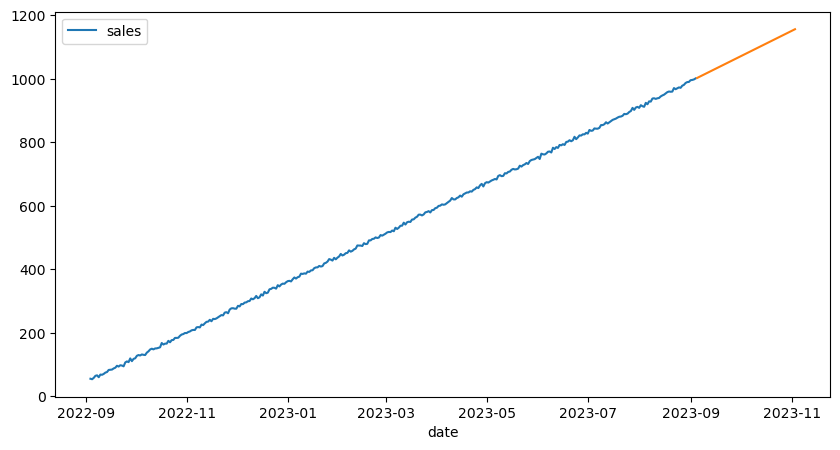

In [92]:
#Graficamos prediccion.

fig, axis = plt.subplots(figsize=(10,5))

sns.lineplot(data = dataSales)
sns.lineplot(data = forecast)

plt.show()